# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import warnings

In [6]:
import os

In [7]:
pip install notebook --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 2. Load Data

In [8]:
df=pd.read_csv('Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [9]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


# 3. Feature Engineering

In [10]:
# Pulse Pressure

In [11]:
df['Pulse Pressure'] = df['Systolic blood pressure'] - df['Diastolic blood pressure']


In [12]:
# 2. Blood Pressure Ratio

In [13]:
df['BP Ratio'] = df['Systolic blood pressure'] / df['Diastolic blood pressure']


In [14]:
# Is Tachycardic (Heart rate > 100 bpm)

In [15]:
df['Tachycardic'] = df['Heart rate'] > 100


In [16]:
# Is Bradycardic (Heart rate < 60 bpm)

In [17]:
df['Bradycardic'] = df['Heart rate'] < 60


In [18]:
# High Blood Sugar Indicator

In [19]:
df['High Blood Sugar'] = df['Blood sugar'] > 200


In [20]:
#Cardiac Enzyme Flags
#These proteins rise during heart attacks

df['CK-MB Elevated'] = df['CK-MB'] > 5  # Typical threshold
df['Troponin Elevated'] = df['Troponin'] > 0.04  # Varies by lab


In [21]:
#Combined Cardiac Risk Score
df['Cardiac Risk Score'] = (
    (df['CK-MB Elevated'].astype(int)) +
    (df['Troponin Elevated'].astype(int)) +
    (df['Blood sugar'] > 200).astype(int)
)



In [22]:
#Age Buckets (Broader)

In [23]:
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100],
                           labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])


In [47]:
import numpy as np
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100],
                           labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

In [24]:
#Result Encoding
df['Result_Encoded'] = df['Result'].map({'negative': 0, 'positive': 1})


# data exploration

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1319 non-null   int64   
 1   Gender                    1319 non-null   int64   
 2   Heart rate                1319 non-null   int64   
 3   Systolic blood pressure   1319 non-null   int64   
 4   Diastolic blood pressure  1319 non-null   int64   
 5   Blood sugar               1319 non-null   float64 
 6   CK-MB                     1319 non-null   float64 
 7   Troponin                  1319 non-null   float64 
 8   Result                    1319 non-null   int64   
 9   AgeCategory               1317 non-null   category
dtypes: category(1), float64(3), int64(6)
memory usage: 94.4 KB


In [49]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1319.0,NaN,NaN,NaN,56.191812,13.647315,14.0,47.0,58.0,65.0,103.0
Gender,1319.0,NaN,NaN,NaN,0.659591,0.474027,0.0,0.0,1.0,1.0,1.0
Heart rate,1319.0,NaN,NaN,NaN,78.336619,51.63027,20.0,64.0,74.0,85.0,1111.0
Systolic blood pressure,1319.0,NaN,NaN,NaN,127.170584,26.12272,42.0,110.0,124.0,143.0,223.0
Diastolic blood pressure,1319.0,NaN,NaN,NaN,72.269143,14.033924,38.0,62.0,72.0,81.0,154.0
Blood sugar,1319.0,NaN,NaN,NaN,146.634344,74.923045,35.0,98.0,116.0,169.5,541.0
CK-MB,1319.0,NaN,NaN,NaN,15.274306,46.327083,0.321,1.655,2.85,5.805,300.0
Troponin,1319.0,NaN,NaN,NaN,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3
Result,1319.0,NaN,NaN,NaN,0.614102,0.486991,0.0,0.0,1.0,1.0,1.0
AgeCategory,1317,4,Senior,705,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Count duplicates
df.duplicated().sum()

np.int64(0)

In [51]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
AgeCategory                 2
dtype: int64

In [52]:
df.shape

(1319, 10)

# Normalization

In [53]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Heart rate'].quantile(0.25)
Q3 = df['Heart rate'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers using Winsorizing
df['Heart rate'] = np.where(df['Heart rate'] > upper_bound, upper_bound,
                            np.where(df['Heart rate'] < lower_bound, lower_bound, df['Heart rate']))

# data visualization

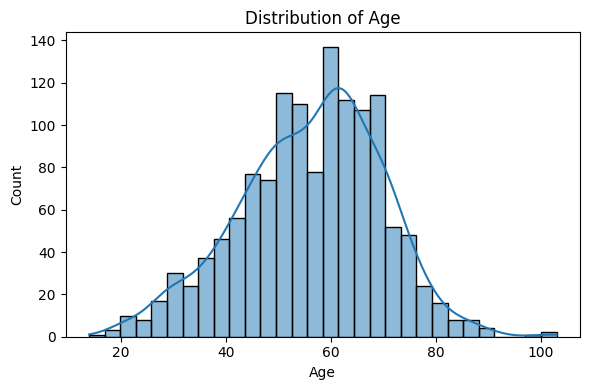

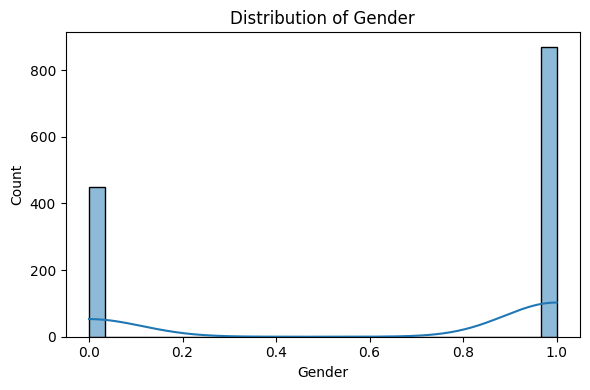

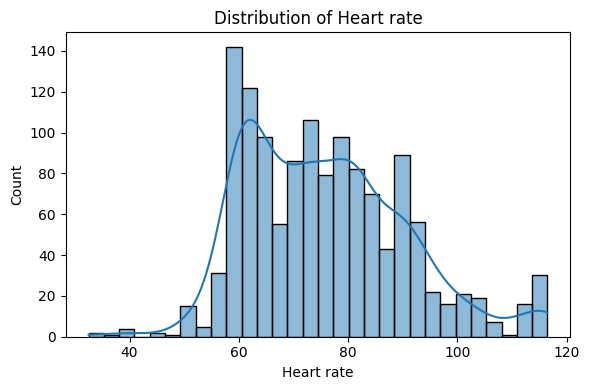

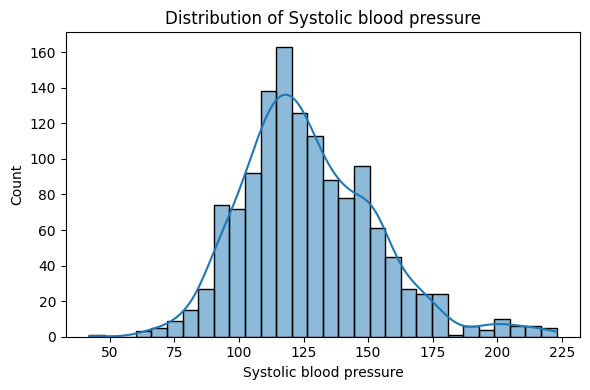

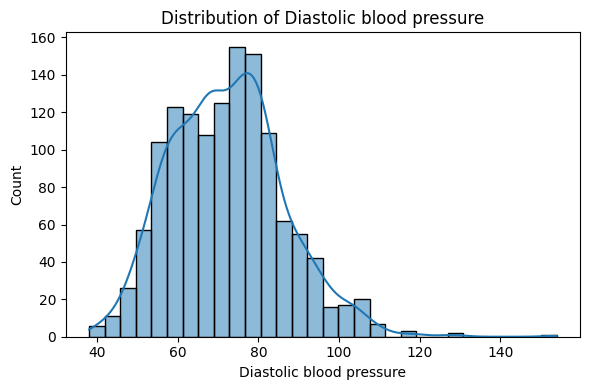

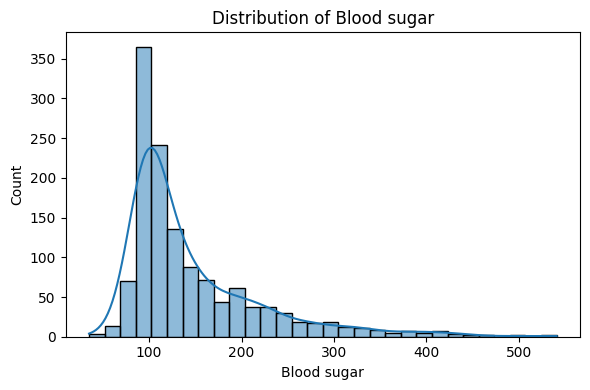

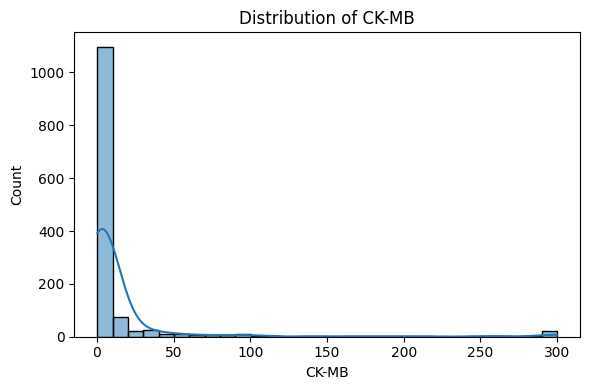

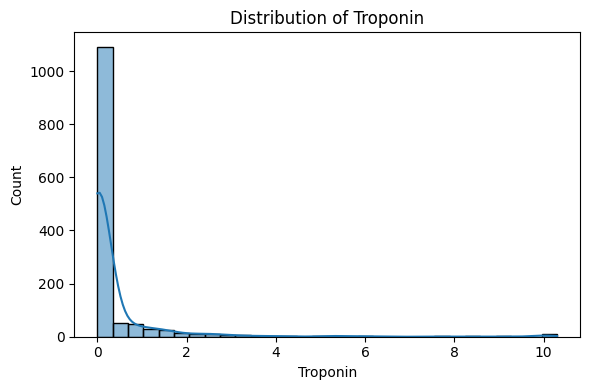

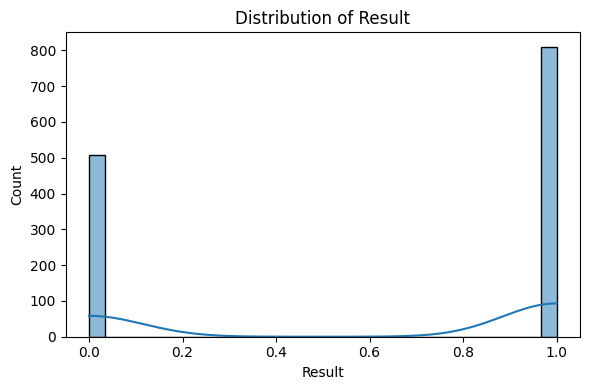

In [54]:
# Distribution plots for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

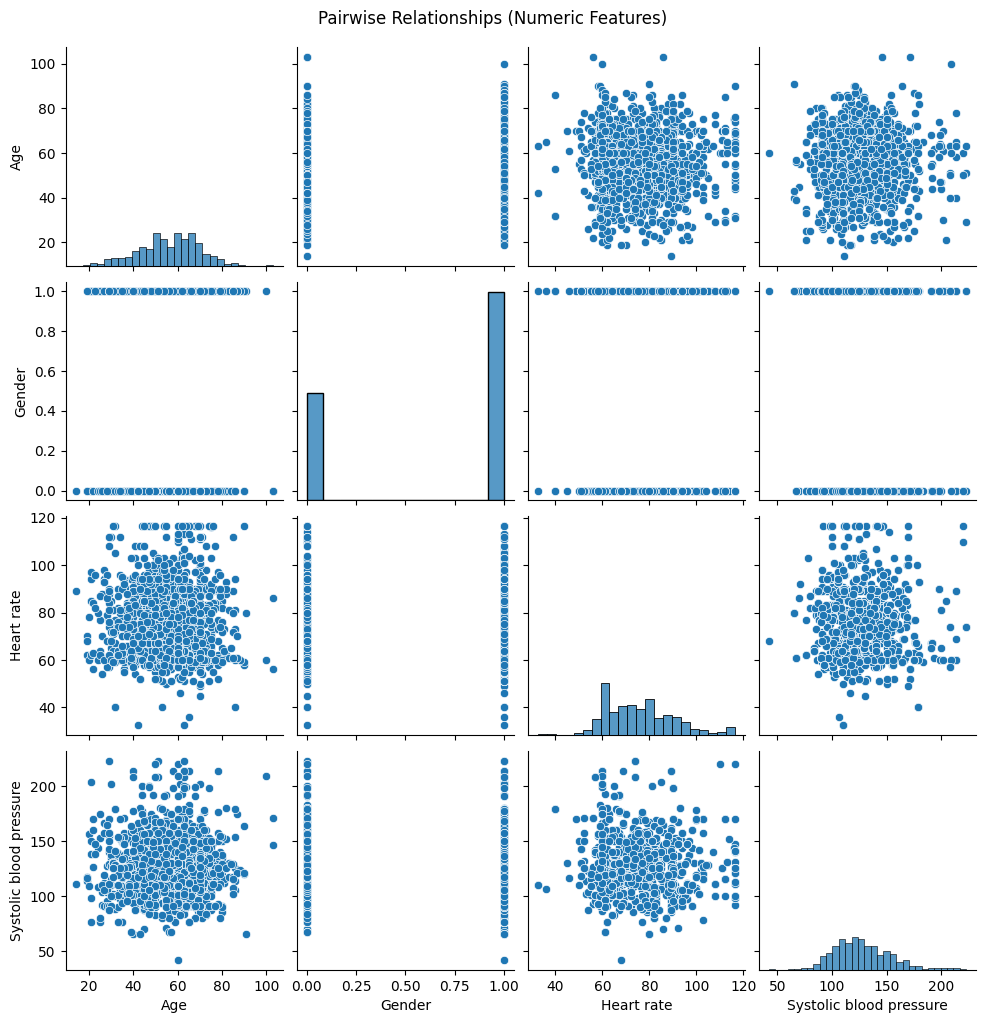

In [55]:
# --- Bivariate Analysis ---
# Pairplot for selected numeric columns
selected_bivariate_cols = numeric_cols[:4]  # take first 4 for illustration
sns.pairplot(df[selected_bivariate_cols])
plt.suptitle('Pairwise Relationships (Numeric Features)', y=1.02)
plt.show()

In [57]:
df.groupby('Gender')['Heart rate'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,449.0,75.809577,14.420964,32.5,64.0,75.0,85.0,116.5
1,870.0,75.994828,15.011243,32.5,64.0,74.0,85.0,116.5


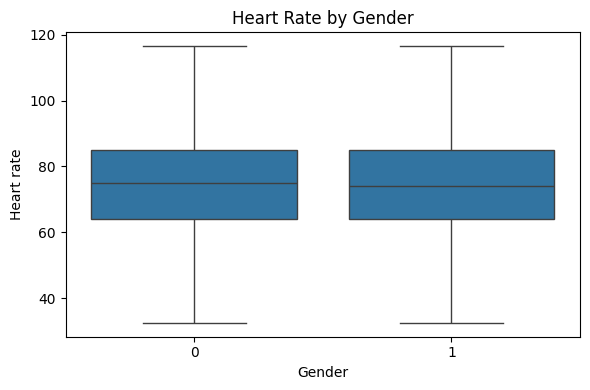

In [58]:
# Boxplot of heart rate by gender (if Gender exists)


if 'Gender' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Gender', y='Heart rate')
    plt.title('Heart Rate by Gender')
    plt.tight_layout()
    plt.show()

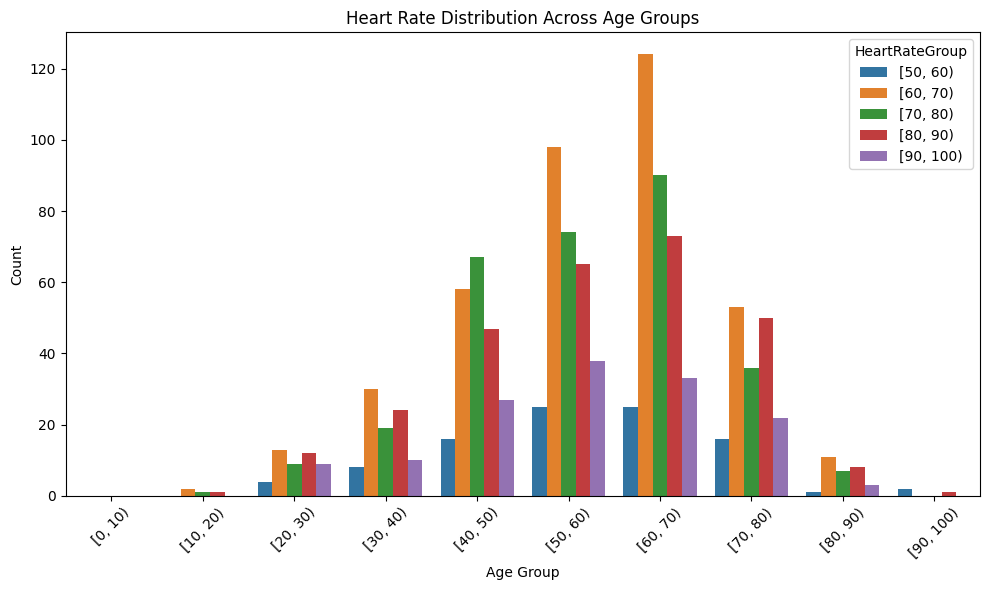

In [59]:
# Bin Age and Heart rate into groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
df['HeartRateGroup'] = pd.cut(df['Heart rate'], bins=[50, 60, 70, 80, 90, 100], right=False)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='HeartRateGroup')
plt.title('Heart Rate Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

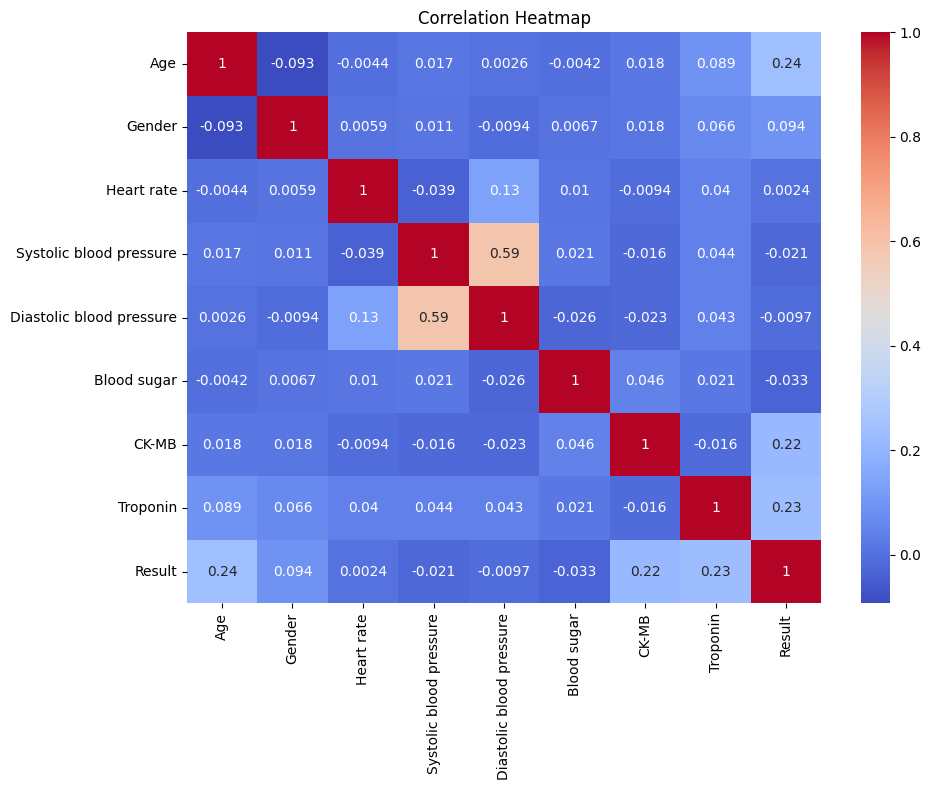

In [60]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [61]:
df.head(20)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,AgeCategory,AgeGroup,HeartRateGroup
0,64,1,66.0,160,83,160.0,1.800,0.012,0,Senior,"[60, 70)","[60.0, 70.0)"
1,21,1,94.0,98,46,296.0,6.750,1.060,1,Young,"[20, 30)","[90.0, 100.0)"
2,55,1,64.0,160,77,270.0,1.990,0.003,0,Senior,"[50, 60)","[60.0, 70.0)"
3,64,1,70.0,120,55,270.0,13.870,0.122,1,Senior,"[60, 70)","[70.0, 80.0)"
4,55,1,64.0,112,65,300.0,1.080,0.003,0,Senior,"[50, 60)","[60.0, 70.0)"
5,58,0,61.0,112,58,87.0,1.830,0.004,0,Senior,"[50, 60)","[60.0, 70.0)"
6,32,0,40.0,179,68,102.0,0.710,0.003,0,Middle-Aged,"[30, 40)",NaN
7,63,1,60.0,214,82,87.0,300.000,2.370,1,Senior,"[60, 70)","[60.0, 70.0)"
8,44,0,60.0,154,81,135.0,2.350,0.004,0,Middle-Aged,"[40, 50)","[60.0, 70.0)"
9,67,1,61.0,160,95,100.0,2.840,0.011,0,Senior,"[60, 70)","[60.0, 70.0)"


In [62]:
# Example Classification (Predicting Disease based on features)
if 'Result_Encoded' in df.columns and df['Result_Encoded'].nunique() > 1:
    features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Result_Encoded']).columns
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['Result_Encoded'], test_size=0.2, random_state=42)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Classification Report:\n" + classification_report(y_test, y_pred))
    print("Confusion Matrix:\n" + str(confusion_matrix(y_test, y_pred)))


In [63]:
# Regression: Predicting Heart Rate
features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Heart rate']).columns
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features], df['Heart rate'], test_size=0.2, random_state=42)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)
print('Regression MSE:', mean_squared_error(y_test_reg, y_pred_reg))

Regression MSE: 204.3335934659091


In [64]:


# 1. Define features and exclude unwanted columns like PCA1 and PCA2
excluded_columns = ['Result_Encoded', 'PCA1', 'PCA2'] if 'PCA1' in df.columns and 'PCA2' in df.columns else ['Result_Encoded']
features = df.select_dtypes(include=['int64', 'float64']).drop(columns=excluded_columns).columns

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Result_Encoded'], test_size=0.2, random_state=42)

# 3. Train the model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# 4. Get feature importances
importances = classifier.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 5. Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue='Feature', palette='viridis', dodge=False, legend=False)

plt.title("Feature Importance in Disease Classification")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


KeyError: "['Result_Encoded'] not found in axis"

In [65]:
# KMeans Clustering on selected features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [66]:
# KMeans Clustering
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [67]:
# PCA Visualization of Clusters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

# Scale numeric data
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Store PCA components in dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

#  Visualize clusters
fig = px.scatter(df, x='PCA1', y='PCA2', color='Cluster',
                 title='KMeans Clustering (PCA Projection)',
                 labels={'Cluster': 'Cluster ID'})
fig.update_layout(template='plotly_white')
fig.show()


In [68]:
#Decision Tree Model
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


dataSet = 'Medicaldataset.csv'

X = []
Y = []

df = pd.read_csv(dataSet, sep=',', header=0)   

#one-hot encode the class
df_encoded = pd.get_dummies(df, columns=['Result'], drop_first=True)

#rename to Result since name changed through one-hot encoding
df_encoded.rename(columns={'Result_positive': 'Result'}, inplace=True)

#drop the class
df_X = df_encoded.drop(['Result'], axis='columns')
X = df_X.to_numpy()

#pass the class
Y = df_encoded['Result'].to_numpy()

#split the dataset into training and test with 20% to testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

added_accuracy = 0
added_precision = 0
added_recall = 0

#loop your training and test tasks 10 times here
for i in range (10):

    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=None)   
    clf = clf.fit(X_train, Y_train)

    compare_class = []
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for X_data, Y_data in zip(X_test, Y_test):
        
        class_predicted = clf.predict([X_data])[0]
           
        #compare the prediction with the true label (located at data[3]) of the test instance to start calculating the model accuracy.
        compare_class.append(class_predicted == Y_data)
        if(Y_data == True):
            if(class_predicted == True):
                TP += 1
            else:
                FN += 1
        else:
            if(class_predicted == True):
                FP += 1
            else:
                TN += 1
            
        
       #find the average accuracy of this model during the 10 runs (training and test set)
    accuracy = (sum(compare_class) / len(compare_class))
    added_accuracy += accuracy
    precision = TP / (TP + FP)
    added_precision += precision
    recall = TP / (TP + FN)
    added_recall += recall

print("Accuracy: ", added_accuracy / 10)
print("Precision: ", added_precision / 10)
print("Recall: ", added_recall / 10)





Accuracy:  0.9818181818181818
Precision:  0.9735284522757954
Recall:  0.9975308641975309


In [69]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

s_values = [0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001]
highestAccuracy = 0
highestPrecision = 0
highestRecall = 0

# Load and prepare data
df = pd.read_csv('Medicaldataset.csv')

# Convert categorical target to numeric
df['Result'] = df['Result'].apply(lambda x: 1 if x == 'positive' else 0)

# Prepare features and labels
X = df.iloc[:, 1:6].astype(float).values
Y = df['Result'].astype(float).values

# Split data
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for s in s_values:
    clf = GaussianNB(var_smoothing=s)
    clf.fit(X_training, Y_training)

    correct_predictions = 0
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for x_testSample, y_testSample in zip(X_test, Y_test):
        class_predicted = clf.predict([x_testSample])[0]

        if y_testSample == class_predicted:
            correct_predictions += 1

        if class_predicted == True:
            if y_testSample == True:
                TP += 1
            else:
                FP += 1
        else:
            if y_testSample == True:
                FN += 1
            else:
                TN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = correct_predictions / len(Y_test)

    if accuracy > highestAccuracy:
        highestAccuracy = accuracy
        print(f"Highest Naive Bayes accuracy so far: {highestAccuracy:.2f}, Parameters: s = {s}")
    if precision > highestPrecision:
        highestPrecision = precision
        print(f"Highest Naive Bayes precision so far: {highestPrecision:.2f}, Parameters: s = {s}")
    if recall > highestRecall:
        highestRecall = recall
        print(f"Highest Naive Bayes recall so far: {highestRecall:.2f}, Parameters: s = {s}")

    
    


Highest Naive Bayes accuracy so far: 0.62, Parameters: s = 0.1
Highest Naive Bayes precision so far: 0.62, Parameters: s = 0.1
Highest Naive Bayes recall so far: 0.99, Parameters: s = 0.1
Highest Naive Bayes accuracy so far: 0.62, Parameters: s = 0.001
Highest Naive Bayes precision so far: 0.62, Parameters: s = 0.001
Highest Naive Bayes accuracy so far: 0.63, Parameters: s = 1e-06
Highest Naive Bayes precision so far: 0.63, Parameters: s = 1e-06
